# Naive Bayes (ALGORITMO)

### Import

In [36]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

### Análise Exploratória de Dados

In [2]:
emails = pd.read_csv('spam_or_not_spam.csv')

In [3]:
emails.head()

,email,label
0,date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...,0
1,martin a posted tassos papadopoulos the greek ...,0
2,man threatens explosion in moscow thursday aug...,0
3,klez the virus that won t die already the most...,0
4,in adding cream to spaghetti carbonara which ...,0


In [4]:
emails.shape

(3000, 2)

In [5]:
emails_dedupl = emails.drop_duplicates()

In [6]:
emails_filtered = emails_dedupl.dropna()

In [7]:
emails_filtered.shape

(2872, 2)

### Tratamento de Texto

In [8]:
df = emails_filtered.copy()

In [9]:
stemmer = PorterStemmer()

In [10]:
nltk.download("stopwords")
stopwords = stopwords.words("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Felipe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
df['unstemmed'] = df['email'].str.split()

In [12]:
df['unstemmed'] = df['unstemmed'].apply(lambda x: [re.sub(r"[^A-Za-z]", " ", y).lower() for y in x])

In [13]:
df['stemmed'] = df['unstemmed'].apply(lambda x: [stemmer.stem(y) for y in x if not y in stopwords])

In [14]:
df['stemmed_stopwords'] = df['stemmed'].apply(lambda x: [item for item in x if item not in stopwords])

In [15]:
df['features'] = df['stemmed_stopwords'].apply(lambda x: ' '.join(x))

In [16]:
df_prod = df[['features', 'label']]

In [17]:
df_prod.head()

,features,label
0,date wed number aug number number number numbe...,0
1,martin post tasso papadopoulo greek sculptor b...,0
2,man threaten explos moscow thursday august num...,0
3,klez viru die alreadi prolif viru ever klez co...,0
4,ad cream spaghetti carbonara effect pasta make...,0


In [18]:
df_prod.shape

(2872, 2)

### Codificações Baseadas em Palavras

In [19]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_prod)
train, validation = train_test_split(train, test_size=0.2)
print('Entradas por Dataset')
print('Dataset de Treino: ', len(train), 'linhas.')
print('Dataset de Validação: ', len(validation), 'linhas.')
print('Dataset de Teste: ', len(test), 'linhas.')

Entradas por Dataset
Dataset de Treino:  1723 linhas.
Dataset de Validação:  431 linhas.
Dataset de Teste:  718 linhas.


In [20]:
train.head()

,features,label
1897,url url date suppli img url matt warchalk jone...,0
145,url url date suppli largest object found sinc ...,0
80,sun number sep number reza b far ebuilt wrote ...,0
98,saw iso intern server tempt origin messag john...,0
83,sun sep number number number number numberpm n...,0


In [21]:
train_ham = train[train['label'] == 0]
train_spam = train[train['label'] == 1]

In [22]:
print("Treino #ham: ", len(train_ham))
print("Treino #spam: ", len(train_spam))

Treino #ham:  1469
Treino #spam:  254


In [23]:
oversampling_factor = len(train_ham) // len(train_spam) # 5

In [24]:
train_spam = train_spam.sample(n=len(train_spam) * oversampling_factor,
                               replace=True)

In [25]:
train = pd.concat([train_ham, train_spam])

### Treinamento

In [26]:
X_train = train['features']
y_train = train['label']

In [27]:
vectorizer = CountVectorizer()

In [28]:
X_train_vectorized = vectorizer.fit_transform(X_train)

In [29]:
classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

### Testes

In [30]:
X_test = test['features']
y_test = test['label']

In [31]:
X_test_vectorized = vectorizer.transform(X_test)

In [32]:
y_pred = classifier.predict(X_test_vectorized)

In [33]:
print('Acurácia: ', accuracy_score(y_test, y_pred))

Acurácia:  0.9860724233983287


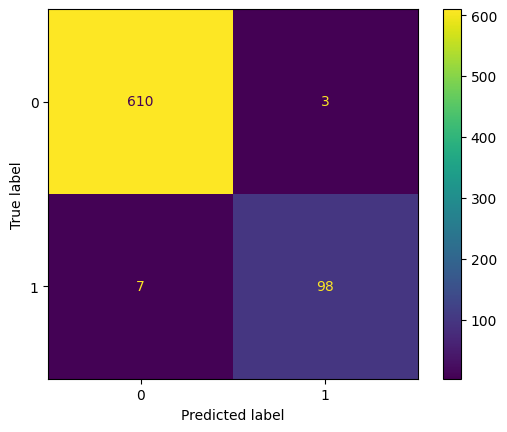

In [37]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)